In [1]:
from itertools import product
import multiprocessing

import pandas as pd
import seaborn as sns
import matplotlib as plt

from fairpair import *

In [2]:
from accuracy_workers import *

## Fairness-Aware PageRank

In [9]:
H = FairPairGraph()
H.generate_groups(400, 200) # same size groups
H.group_assign_scores(nodes=H.nodes, loc=0, scale=1) # general score distribution
ranker = RankRecovery(H)
sampler = RandomSampling(H, warn=False)
sampler.apply(iter=500, k=1)
ranking, other_nodes = ranker.apply(rank_using='fairPageRank', cutoff=0.4)

In [19]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    accuracy = pool.map(get_cutoff_accuracy, range(10))
    accuracy = [result for pool in accuracy for result in pool]
    accuracy = pd.DataFrame(accuracy, columns=['trial', 'iteration', 'cutoff', 'Weighted Kemeny distance'])

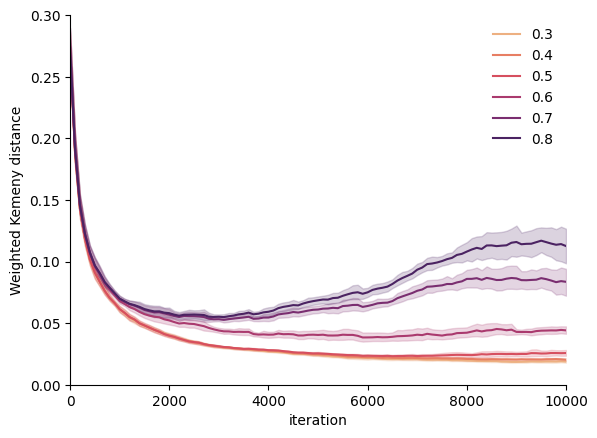

In [20]:
ax = sns.lineplot(accuracy, x='iteration', y='Weighted Kemeny distance', hue='cutoff', palette='flare')
ax.legend(title=None, frameon=False)
ax.set(ylim=(0,0.3), xlim=(0,10000))
sns.despine()

## Simulate Impact of Cut-Off

In [3]:
tasks = list(product(range(10), [davidScore, rankCentrality, 'fairPageRank']))

if __name__ == '__main__':
    pool = multiprocessing.Pool()
    accuracy = pool.starmap(get_simulated_cutoff, tasks)
    accuracy = [result for pool in accuracy for result in pool]
    accuracy = pd.DataFrame(accuracy, columns=['trial', 'iteration', 'cutoff', 'Weighted Kemeny distance', 'method'])

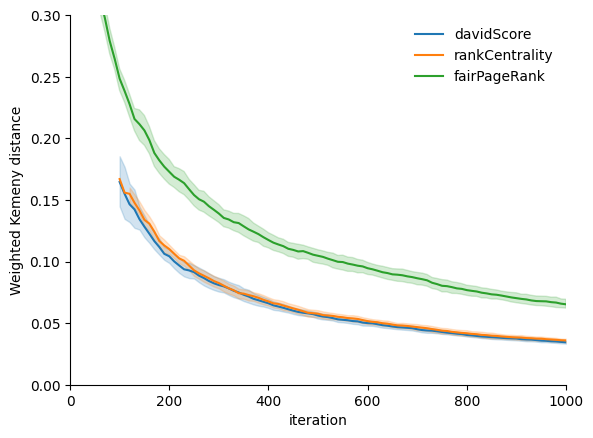

In [5]:
ax = sns.lineplot(accuracy, x='iteration', y='Weighted Kemeny distance', hue='method')
ax.legend(title=None, frameon=False)
ax.set(ylim=(0,0.3), xlim=(0,1000))
sns.despine()

## Comparing Accuracy

In [6]:
tasks = list(product(range(10), [davidScore, rankCentrality, 'fairPageRank']))

if __name__ == '__main__':
    pool = multiprocessing.Pool()
    accuracy = pool.starmap(get_method_accuracy, tasks)
    accuracy = [result for pool in accuracy for result in pool]
    accuracy = pd.DataFrame(accuracy, columns=['trial', 'iteration', 'Weighted Kemeny distance', 'group', 'method'])

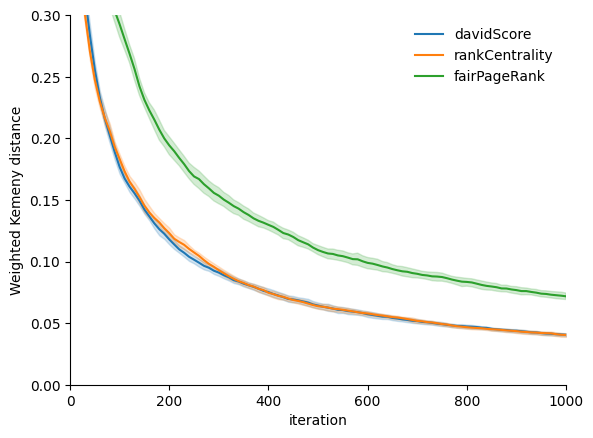

In [7]:
ax = sns.lineplot(accuracy, x='iteration', y='Weighted Kemeny distance', hue='method')
ax.legend(title=None, frameon=False)
ax.set(ylim=(0,0.3), xlim=(0,1000))
sns.despine()